# Import Dependencies

In [2]:
import pandas as pd
import json

In [34]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [156]:
import numpy as np

# Read data

In [270]:
path='/Users/thuancao/Desktop/spark-cluster-package/data/621074188511_vpcflowlogs_ap-southeast-1_fl-021885c43ae5ab649_20240529T0630Z_814c9ae7.log'

In [271]:
log_data=open(path,'r')

In [272]:
print(log_data)

<_io.TextIOWrapper name='/Users/thuancao/Desktop/spark-cluster-package/data/621074188511_vpcflowlogs_ap-southeast-1_fl-021885c43ae5ab649_20240529T0630Z_814c9ae7.log' mode='r' encoding='UTF-8'>


In [273]:
result=[]
for line in log_data:
    columns = line.split(' ') #or w/e you're delimiter/separator is
    result.append(columns)


In [274]:
df = pd.DataFrame(result[1:], columns = result[0])

In [275]:
df

,account-id,action,az-id,dstaddr,dstport,srcaddr,srcport,start,end,log-status,packets,protocol,region,subnet-id,tcp-flags,traffic-path,type,vpc-id\n
0,621074188511,REJECT,apse1-az3,10.0.34.229,9613,162.216.150.200,55076,1716964340,1716964360,OK,1,6,ap-southeast-1,subnet-088f34c410d831bac,2,-,IPv4,vpc-0d0f7a06237d2f540\n
1,621074188511,REJECT,apse1-az3,10.0.34.229,49431,35.203.210.36,49415,1716964340,1716964360,OK,1,6,ap-southeast-1,subnet-088f34c410d831bac,2,-,IPv4,vpc-0d0f7a06237d2f540\n
2,621074188511,REJECT,apse1-az3,10.0.34.229,9145,162.216.149.195,51519,1716964340,1716964360,OK,1,6,ap-southeast-1,subnet-088f34c410d831bac,2,-,IPv4,vpc-0d0f7a06237d2f540\n
3,621074188511,REJECT,apse1-az3,10.0.34.229,18082,162.216.149.230,49722,1716964340,1716964360,OK,1,6,ap-southeast-1,subnet-088f34c410d831bac,2,-,IPv4,vpc-0d0f7a06237d2f540\n
4,621074188511,REJECT,apse1-az3,10.0.34.229,51727,50.116.59.19,40142,1716964340,1716964360,OK,1,6,ap-southeast-1,subnet-088f34c410d831bac,2,-,IPv4,vpc-0d0f7a06237d2f540\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,621074188511,-,apse1-az3,-,-,-,-,1716964443,1716964474,NODATA,-,-,ap-southeast-1,subnet-01ae806d12c898e8c,-,-,-,vpc-0d0f7a06237d2f540\n
1295,621074188511,-,apse1-az1,-,-,-,-,1716964456,1716964487,NODATA,-,-,ap-southeast-1,subnet-0d83ceb7e26e0422a,-,-,-,vpc-0d0f7a06237d2f540\n
1296,621074188511,ACCEPT,apse1-az1,10.0.30.219,47833,35.203.210.169,49706,1716964477,1716964488,OK,1,6,ap-southeast-1,subnet-01eb9742ca0f3ef5b,2,-,IPv4,vpc-0d0f7a06237d2f540\n
1297,621074188511,ACCEPT,apse1-az1,10.0.30.219,12345,205.210.31.139,52687,1716964477,1716964488,OK,1,6,ap-southeast-1,subnet-01eb9742ca0f3ef5b,2,-,IPv4,vpc-0d0f7a06237d2f540\n


# Transform the data

In [276]:
df['start'] = pd.to_datetime(df['start'], unit='s')

/var/folders/40/qb8fzn1n6cs8vhgyxj5v9dnc0000gn/T/ipykernel_49045/1655801879.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['start'] = pd.to_datetime(df['start'], unit='s')


In [277]:
df['end'] = pd.to_datetime(df['end'], unit='s')

/var/folders/40/qb8fzn1n6cs8vhgyxj5v9dnc0000gn/T/ipykernel_49045/4085382784.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['end'] = pd.to_datetime(df['end'], unit='s')


In [278]:
df['start_date'] = df['start'].dt.date
df['end_date'] = df['end'].dt.date
df['start_time'] = df['start'].dt.time
df['end_time'] = df['end'].dt.time

In [262]:
accepted_idx = (df['action'] == 'ACCEPT')
rejected_idx = (df['action'] == 'REJECT')

In [263]:
dst_idx = df['dstaddr'].str.startswith('10.0.')
src_idx = df['srcaddr'].str.startswith('10.0.')

In [264]:
in_idx = ~dst_idx & src_idx
out_idx = ~src_idx & dst_idx
local_idx = src_idx & dst_idx
accepted_in_idx = accepted_idx & in_idx
accepted_out_idx = accepted_idx & out_idx
rejected_in_idx = rejected_idx & in_idx
rejected_out_idx = rejected_idx & out_idx


In [265]:
top10_in = df[in_idx].groupby('srcaddr')['start'].count().sort_values(ascending=False)[:10]

In [266]:
top10_out = df[out_idx].groupby('srcaddr')['start'].count().sort_values(ascending=False)[:10]


In [244]:
import seaborn as sns

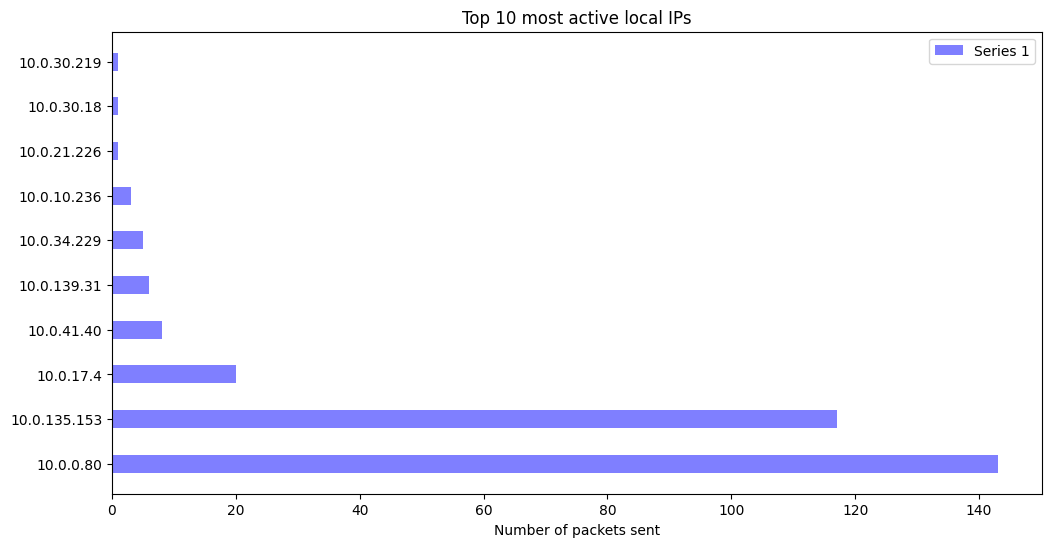

In [292]:
# Create a new figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart using Seaborn's barplot()
y = range(len(top10_in))
ax.barh(y, top10_in, height=0.4, color='blue', alpha=0.5, label='Series 1')


# Set labels and title
ax.set_yticks(y)
ax.set_yticklabels(top10_in.index)
ax.set_xlabel('Number of packets sent')
plt.title('Top 10 most active local IPs')

# Add a legend
ax.legend()

# Display the plot
plt.show()

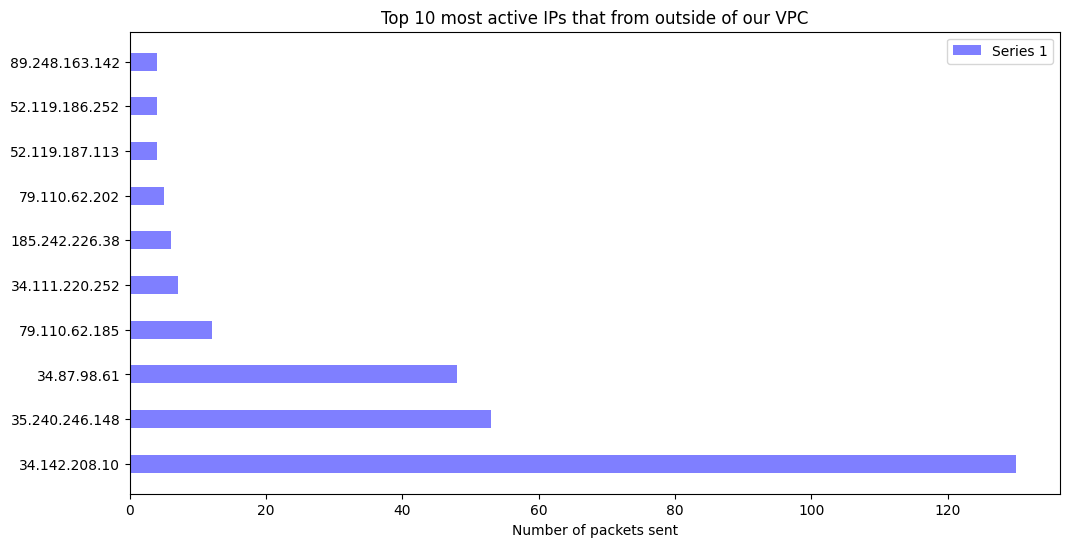

In [293]:
# Create a new figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart using Seaborn's barplot()
y = range(len(top10_out))
ax.barh(y, top10_out, height=0.4, color='blue', alpha=0.5, label='Series 1')


# Set labels and title
ax.set_yticks(y)
ax.set_yticklabels(top10_out.index)
ax.set_xlabel('Number of packets sent')
plt.title('Top 10 most active IPs that from outside of our VPC')

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [216]:
inbound = df.loc[in_idx].groupby('start_time')['action'].count()
outbound = df.loc[out_idx].groupby('start_time')['action'].count()
local = df.loc[local_idx].groupby('start_time')['action'].count()
accepted_packets = df[accepted_idx].groupby('start_time')['action'].count()
rejected_packets = df[rejected_idx].groupby('start_time')['action'].count()
accepted_in_packets = df[accepted_in_idx].groupby('start_time')['action'].count()
rejected_in_packets = df[rejected_in_idx].groupby('start_time')['action'].count()
accepted_out_packets = df[accepted_out_idx].groupby('start_time')['action'].count()
rejected_out_packets = df[rejected_out_idx].groupby('start_time')['action'].count()

In [203]:
IOL_pie = {
    'Inbound': inbound.sum(),
    'Outbound': outbound.sum(),
    'Local': local.sum()
}

In [142]:
protocol_dict = {
    '1': 'ICMP',
    '2': 'IGMP', 
    '3': 'GGP',
    '4': 'IP-in-IP',
    '6': 'TCP',
    '8': 'EGP',
    '9': 'IGP',
    '17': 'UDP',
    '41': 'IPv6',
    '47': 'GRE',
    '50': 'ESP',
    '51': 'AH',
    '58': 'ICMPv6',
    '88': 'EIGRP',
    '89': 'OSPF',
    '92': 'MSP',
    '103': 'PIM',
    '112': 'VRRP',
    '115': 'L2TP',
    '132': 'SCTP',
    '136': 'UDPLite'
}

In [146]:
df = df[df['protocol'] != '-']

In [176]:
protocol = df['protocol'].apply(lambda x: protocol_dict.get(x, 'Unknown'))

<Axes: >

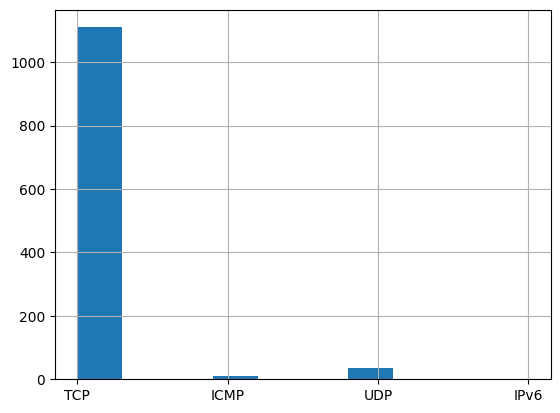

In [183]:
protocol.hist()

In [177]:
data_dict = {x: (protocol==x).sum() for x in set(protocol)}

In [147]:
df['protocol'].unique()

array(['6', '1', '17', '41'], dtype=object)

In [157]:
pie_count = np.unique(pie, return_counts = True)

(array(['ICMP', 'IPv6', 'TCP', 'UDP'], dtype=object),
 array([   9,    1, 1110,   34]))

# Plotting data

In [184]:
# inbound

start_time
06:32:20     5
06:32:24     6
06:32:26    15
06:32:37     6
06:32:38     3
            ..
06:34:36     6
06:34:37    10
06:34:39     1
06:34:40     1
06:34:43     2
Name: action, Length: 65, dtype: int64

In [208]:
def plot_series(data, title=None, labels = None):
    fig, ax = plt.subplots(figsize=(12, 6))

    # Check if data is a single Pandas Series or an array of Series
    if isinstance(data, list):
        # Iterate over the array of Series and plot each one
        for i, series in enumerate(data):
            series.plot(ax=ax, label=labels[i])
    else:
        # Plot the single Pandas Series
        data.plot(ax=ax)

    # Rotate the x-axis labels to be vertical
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Add labels and title
    ax.set_xlabel('Time')
    ax.set_ylabel('Number of packets')
    ax.set_title(title)
    ax.legend()

    # Display the plot
    plt.show()

/var/folders/40/qb8fzn1n6cs8vhgyxj5v9dnc0000gn/T/ipykernel_49045/3225837257.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


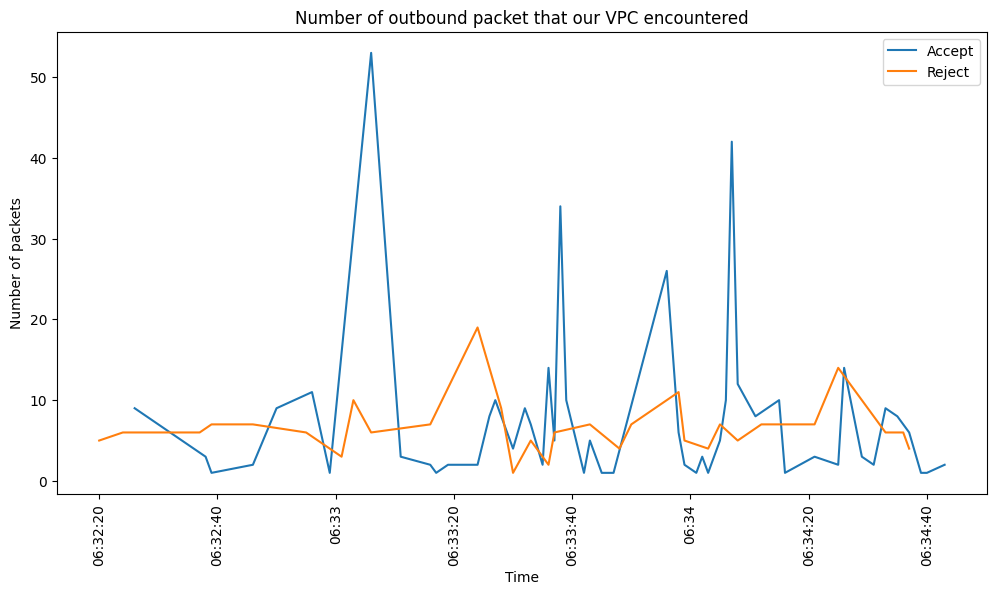

In [219]:
plot_series([accepted_out_packets, rejected_out_packets], 'Number of outbound packet that our VPC encountered', ['Accept', 'Reject'])

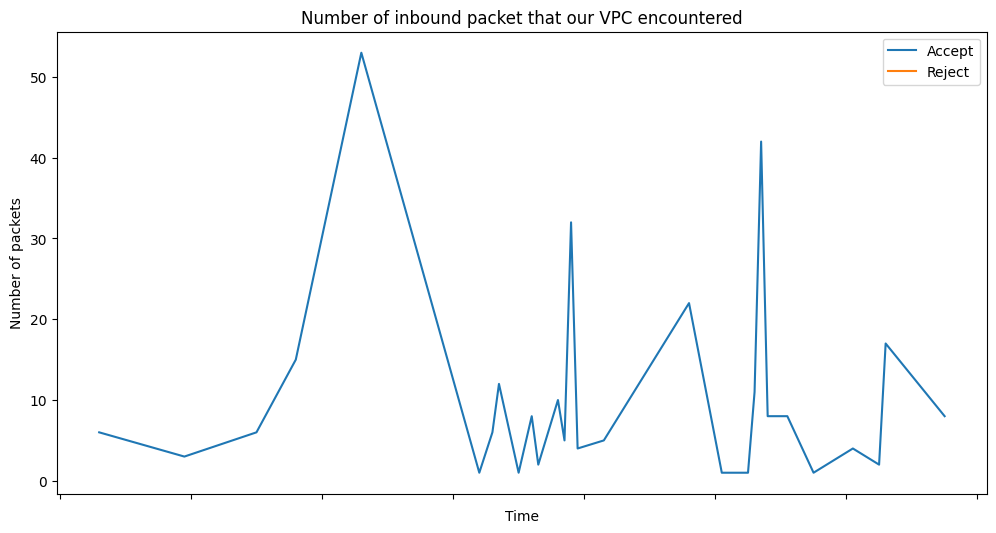

In [221]:
plot_series([accepted_in_packets, rejected_in_packets], 'Number of inbound packet that our VPC encountered', ['Accept', 'Reject'])

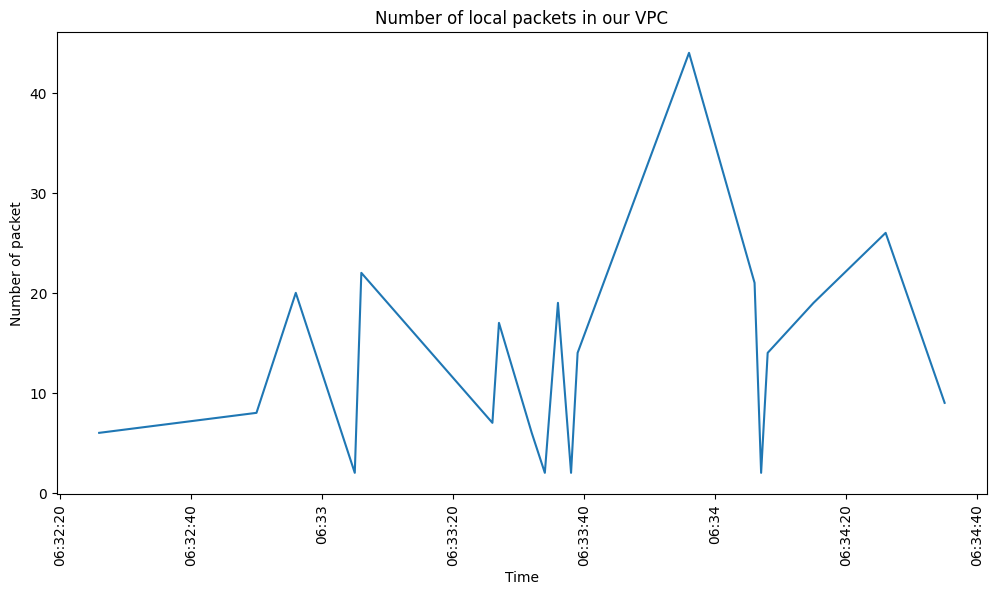

In [194]:
plot_series(local, 'Number of local packets in our VPC')

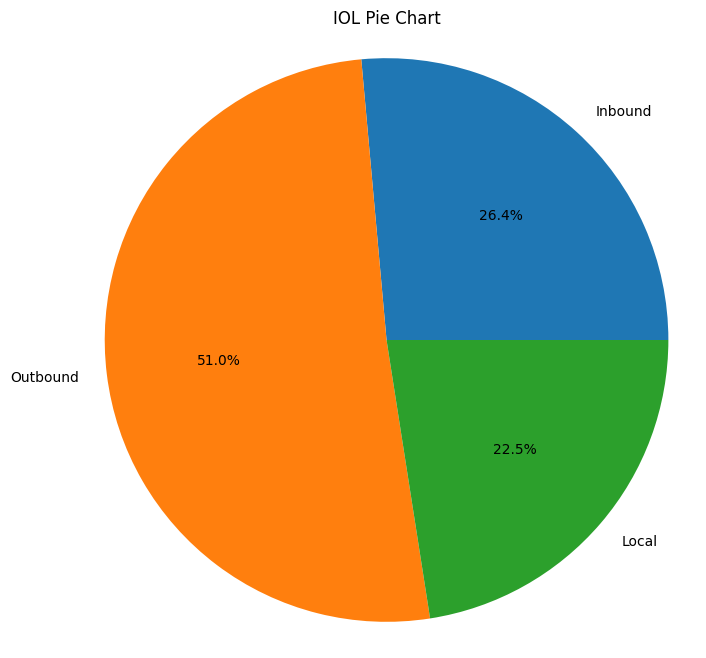

In [204]:
labels = list(IOL_pie.keys())
values = list(IOL_pie.values())

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("IOL Pie Chart")
plt.axis('equal')
plt.show()